In [33]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import ast
from IPython.display import display, Image
from PIL import Image


In [6]:
battles_df=pd.read_csv("../Common/battle_logs_info.csv")
battles_df.head(1)

,team,prevTowersDestroyed,gameMode,challengeTitle,deckSelection,isHostedMatch,challengeId,type,boatBattleSide,isLadderTournament,opponent,newTowersDestroyed,boatBattleWon,challengeWinCountBefore,remainingTowers,arena,tournamentTag,battleTime
0,"[{'tag': '#QRP0V9GJ9', 'name': 'ReyJose2005', ...",NaN,"{'id': 72000044, 'name': 'Ladder_GoldRush'}",NaN,collection,False,NaN,PvP,NaN,False,"[{'tag': '#8PRJQVQ08', 'name': 'Papa', 'starti...",NaN,NaN,NaN,NaN,"{'id': 54000014, 'name': 'Arena 17'}",NaN,20230324T214826.000Z


# Expansion of Columns from nested Columns

In [7]:
cards=[]
leak=[]
tags=[]
crowns=[]
kingTowerHitPoints=[]
princessTowersHitPoints=[]
for player_info_str in battles_df["team"]:
    player_info = ast.literal_eval(player_info_str)
    player_info_str= player_info[0]
    cards.append(player_info_str['cards'])
    leak.append(player_info_str['elixirLeaked'])
    tags.append(player_info_str['tag'])
    crowns.append(player_info_str['crowns'])
    kingTowerHitPoints.append(player_info_str['kingTowerHitPoints'])
    princessTowersHitPoints.append(player_info_str['princessTowersHitPoints'])

battles_df["pCards"]=cards
battles_df["pLeak"]=leak
battles_df["pTags"]=tags
battles_df["pCrowns"]=crowns
battles_df["pKingTowerHitPoints"]=kingTowerHitPoints
battles_df["pPrincessTowersHitPoints"]=princessTowersHitPoints
battles_df.drop(['team'], axis=1, inplace=True)
battles_df.head(1)

,prevTowersDestroyed,gameMode,challengeTitle,deckSelection,isHostedMatch,challengeId,type,boatBattleSide,isLadderTournament,opponent,...,remainingTowers,arena,tournamentTag,battleTime,pCards,pLeak,pTags,pCrowns,pKingTowerHitPoints,pPrincessTowersHitPoints
0,NaN,"{'id': 72000044, 'name': 'Ladder_GoldRush'}",NaN,collection,False,NaN,PvP,NaN,False,"[{'tag': '#8PRJQVQ08', 'name': 'Papa', 'starti...",...,NaN,"{'id': 54000014, 'name': 'Arena 17'}",NaN,20230324T214826.000Z,"[{'name': 'Mirror', 'id': 28000006, 'level': 9...",6.11,#QRP0V9GJ9,0,0,None


In [8]:
cards=[]
leak=[]
tags=[]
crowns=[]
kingTowerHitPoints=[]
princessTowersHitPoints=[]
for player_info_str in battles_df["opponent"]:
    player_info = ast.literal_eval(player_info_str)
    player_info_str= player_info[0]
    cards.append(player_info_str['cards'])
    leak.append(player_info_str['elixirLeaked'])
    tags.append(player_info_str['tag'])
    crowns.append(player_info_str['crowns'])
    kingTowerHitPoints.append(player_info_str['kingTowerHitPoints'])
    princessTowersHitPoints.append(player_info_str['princessTowersHitPoints'])

battles_df["oCards"]=cards
battles_df["oLeak"]=leak
battles_df["oTags"]=tags
battles_df["oCrowns"]=crowns
battles_df["oKingTowerHitPoints"]=kingTowerHitPoints
battles_df["oPincessTowersHitPoints"]=princessTowersHitPoints
battles_df.drop(['opponent'], axis=1, inplace=True)
battles_df.head(1)

,prevTowersDestroyed,gameMode,challengeTitle,deckSelection,isHostedMatch,challengeId,type,boatBattleSide,isLadderTournament,newTowersDestroyed,...,pTags,pCrowns,pKingTowerHitPoints,pPrincessTowersHitPoints,oCards,oLeak,oTags,oCrowns,oKingTowerHitPoints,oPincessTowersHitPoints
0,NaN,"{'id': 72000044, 'name': 'Ladder_GoldRush'}",NaN,collection,False,NaN,PvP,NaN,False,NaN,...,#QRP0V9GJ9,0,0,None,"[{'name': 'Mini P.E.K.K.A', 'id': 26000018, 'l...",1.06,#8PRJQVQ08,3,6408,"[2330, 50]"


In [9]:
for player_info_str in battles_df["gameMode"]:
    player_info = ast.literal_eval(player_info_str)
    battles_df["gameMode"]=player_info["name"]

battles_df.head(1)

,prevTowersDestroyed,gameMode,challengeTitle,deckSelection,isHostedMatch,challengeId,type,boatBattleSide,isLadderTournament,newTowersDestroyed,...,pTags,pCrowns,pKingTowerHitPoints,pPrincessTowersHitPoints,oCards,oLeak,oTags,oCrowns,oKingTowerHitPoints,oPincessTowersHitPoints
0,NaN,Draft_Competitive,NaN,collection,False,NaN,PvP,NaN,False,NaN,...,#QRP0V9GJ9,0,0,None,"[{'name': 'Mini P.E.K.K.A', 'id': 26000018, 'l...",1.06,#8PRJQVQ08,3,6408,"[2330, 50]"


# Remove Unnecessary Columns

In [10]:
battles_df.drop(["isLadderTournament","newTowersDestroyed","boatBattleWon","prevTowersDestroyed","challengeTitle","deckSelection","isHostedMatch","challengeId","boatBattleSide",'challengeWinCountBefore',"tournamentTag"], axis=1, inplace=True)
for i in battles_df:
    print(i)

gameMode
type
remainingTowers
arena
battleTime
pCards
pLeak
pTags
pCrowns
pKingTowerHitPoints
pPrincessTowersHitPoints
oCards
oLeak
oTags
oCrowns
oKingTowerHitPoints
oPincessTowersHitPoints


# Reorganised Data Representation

In [11]:
battle_log={}

battle_log["outcome"] = battles_df["pCrowns"] >battles_df["oCrowns"]
        
battle_log["tag"] = battles_df["pTags"]
battle_log["playerCrown"]= battles_df["pCrowns"]
battle_log["playerSideTower"] = battles_df["pPrincessTowersHitPoints"]
battle_log["playerKingTower"] = battles_df["pKingTowerHitPoints"]
battle_log["playerLeak"]= battles_df["pLeak"]

battle_log["opponentTag"] = battles_df["oTags"]
battle_log["opponentCrown"]= battles_df["oCrowns"]
battle_log["opponentSideTower"] = battles_df["oPincessTowersHitPoints"]
battle_log["opponentKingTower"] = battles_df["oKingTowerHitPoints"]
battle_log["opponentLeak"]= battles_df["oLeak"]

battle_log["player Deck"]= battles_df["pCards"]
battle_log["opponent Deck"] = battles_df["oCards"]



df=pd.DataFrame(battle_log)


In [12]:
df.head(1)

,outcome,tag,playerCrown,playerSideTower,playerKingTower,playerLeak,opponentTag,opponentCrown,opponentSideTower,opponentKingTower,opponentLeak,player Deck,opponent Deck
0,False,#QRP0V9GJ9,0,None,0,6.11,#8PRJQVQ08,3,"[2330, 50]",6408,1.06,"[{'name': 'Mirror', 'id': 28000006, 'level': 9...","[{'name': 'Mini P.E.K.K.A', 'id': 26000018, 'l..."


# Cards Analysis

In [14]:
card_info=pd.read_csv("../Common/card_info.csv")
card_info=pd.DataFrame(card_info)
card_info.drop(["iconUrls"],axis=1,inplace=True)

Text(0.5, 0, 'Elixir Cost')

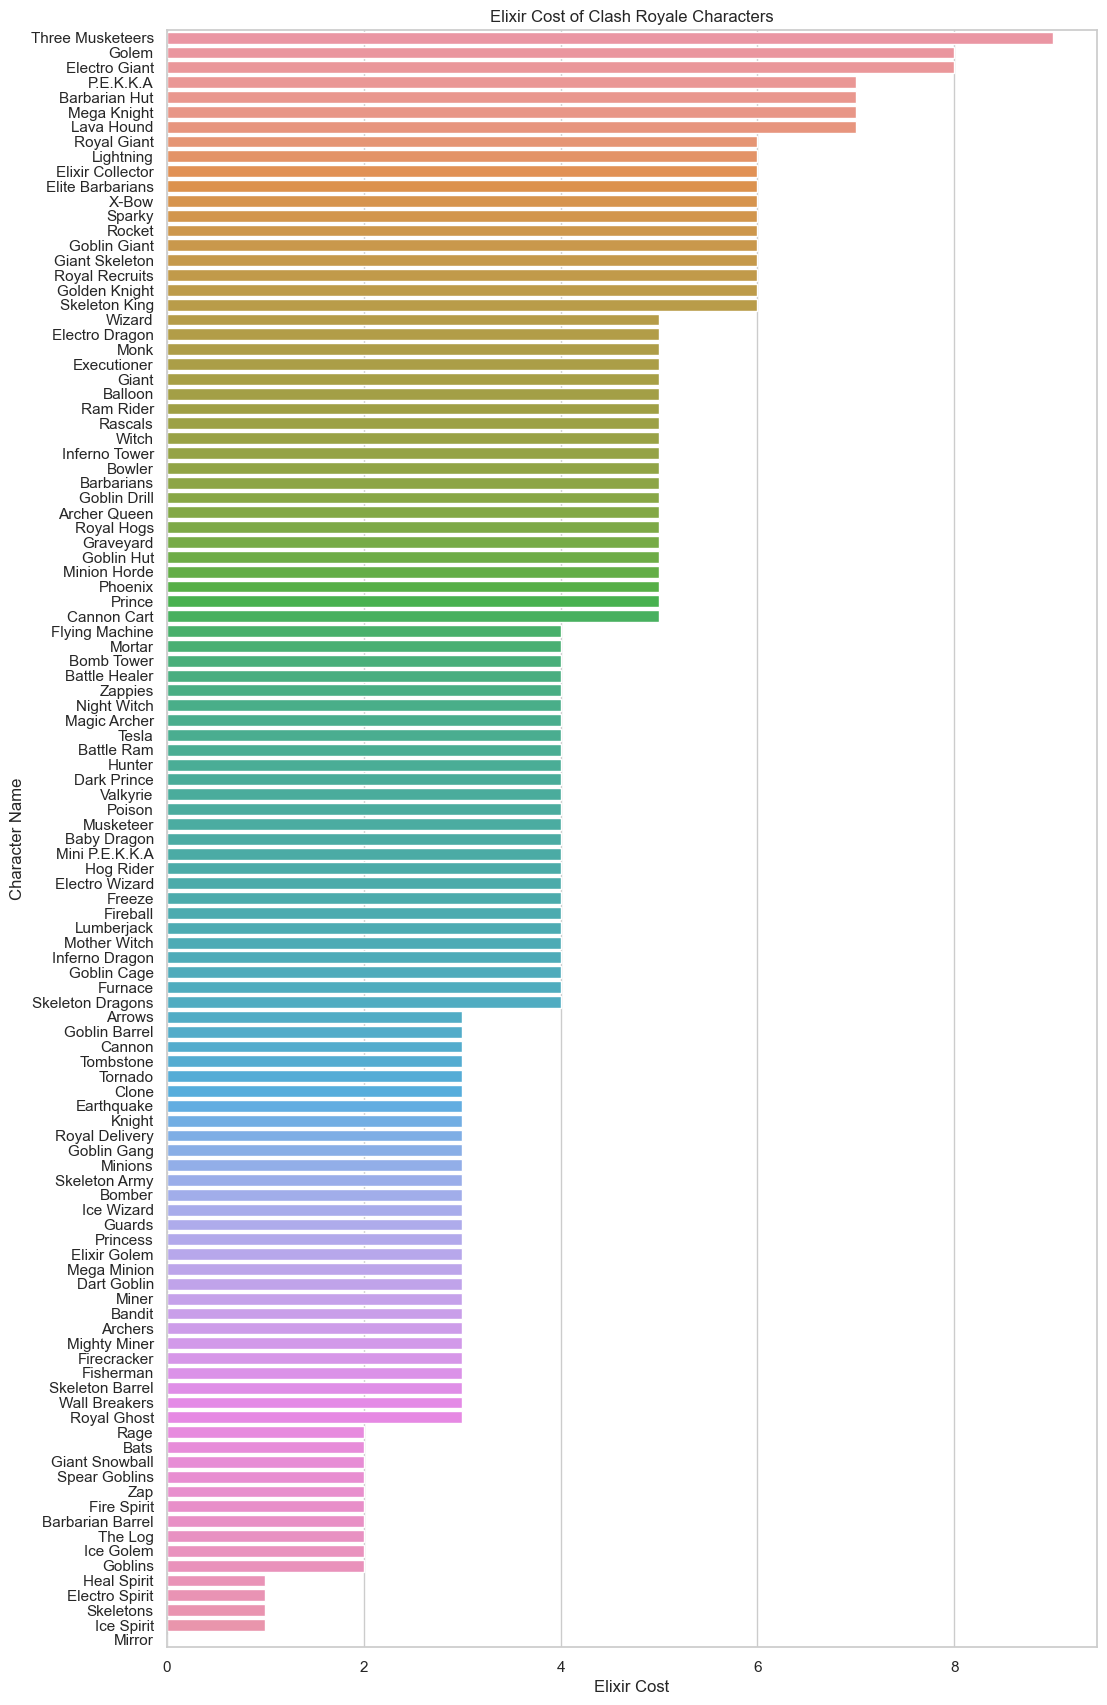

In [15]:
card_info_sorted= card_info.sort_values('elixirCost', ascending=False)

sb.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12,21))
ax = sb.barplot(y=card_info_sorted['name'], x=card_info_sorted['elixirCost'])

# Customize the plot
ax.set_title("Elixir Cost of Clash Royale Characters")
ax.set_ylabel("Character Name")
ax.set_xlabel("Elixir Cost")

In [16]:
card_elixir = dict(zip(card_info['name'], card_info['elixirCost']))

# Player Deck Analysis
We will first analyse the players deck, We can uterlise both player and opponent, depending on who is the winner. We will determine from initial analysis the following 
1. Average elixir Cost
2. Best exlixir Cost that won
3. Most Common Deck
4. Most Common Deck that won
5. Most Common Card
6. Most Common Card that won

## Making Custom DataFrame

In [17]:
card_analysis = pd.DataFrame(df['outcome'])

player_decks = []
player_average_elixir=[]
opponent_decks = []
opponent_average_elixir=[]

for index, row in df.iterrows():
    # Get player deck and opponent deck
    player_deck = [card['name'] for card in row['player Deck']]
    opponent_deck = [card['name'] for card in row['opponent Deck']]
    p_elixir_average=0
    o_elixir_average=0
    for i in player_deck:
        if(i)==None:
            continue
        p_elixir_average+=card_elixir[i]
    for i in opponent_deck:
        if(i)==None:
            continue
        o_elixir_average+=card_elixir[i]
    # Add decks to lists
    player_average_elixir.append(p_elixir_average/len(player_deck))
    player_decks.append(player_deck)
    opponent_decks.append(opponent_deck)
    opponent_average_elixir.append(o_elixir_average/len(opponent_deck))
    
    # Add outcome to DataFrame

# Add player and opponent deck columns
card_analysis['Player Deck'] = player_decks
card_analysis['Opponent Deck'] = opponent_decks
card_analysis['Player Average Elixir']= player_average_elixir
card_analysis['Opponent Average Elixir']= opponent_average_elixir
card_analysis=card_analysis.dropna()
card_analysis.head(2)


,outcome,Player Deck,Opponent Deck,Player Average Elixir,Opponent Average Elixir
0,False,"[Mirror, Clone, Mega Knight, Wizard, Zap, The ...","[Mini P.E.K.K.A, Wizard, Executioner, Goblin B...",3.125,4.50
1,False,"[Dart Goblin, Spear Goblins, Goblin Cage, Rasc...","[Mega Minion, Goblin Barrel, Poison, Valkyrie,...",3.375,3.25


## 1. Average Elixir Cost

<AxesSubplot:xlabel='Opponent Average Elixir', ylabel='Count'>

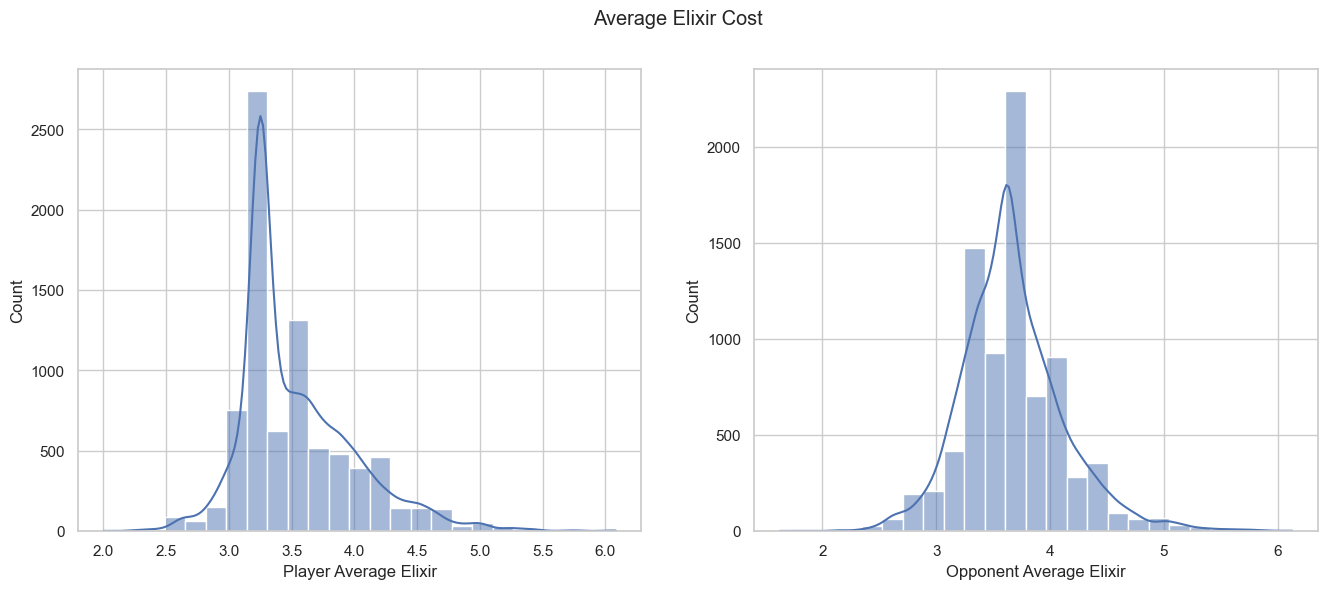

In [18]:
f, axes = plt.subplots(1,2, figsize=(16, 6))
f.suptitle("Average Elixir Cost")
sb.histplot(x = card_analysis["Player Average Elixir"], bins=25,ax=axes[0], kde=True)
sb.histplot(x = card_analysis["Opponent Average Elixir"], bins=25,ax=axes[1], kde=True)

## 2. Best Elixir Cost That Won

Number of Won by Player: 4242
Number of Won by Opponent: 3918


<AxesSubplot:xlabel='Opponent Average Elixir', ylabel='Count'>

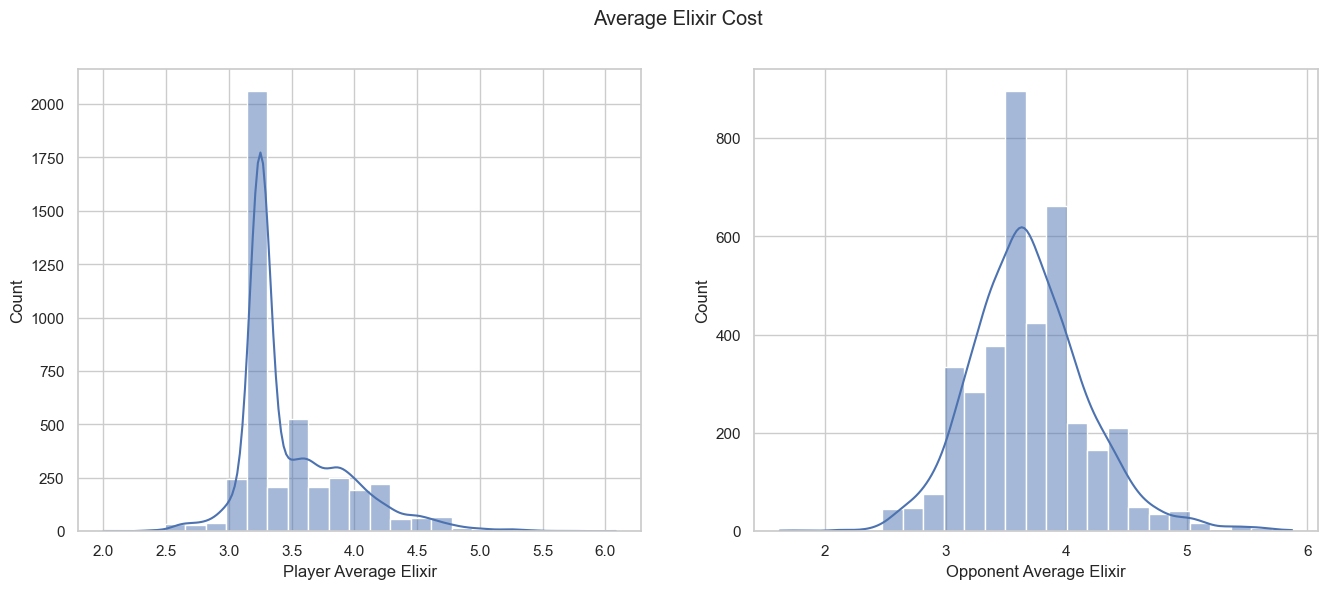

In [19]:
f, axes = plt.subplots(1,2, figsize=(16, 6))
f.suptitle("Average Elixir Cost")
df_sorted = card_analysis.sort_values('outcome', ascending=False)
count=0
total=0
for i in df_sorted['outcome']:
    total+=1
    if i:
        count+=1
print("Number of Won by Player:", count)
print("Number of Won by Opponent:", total-count)
sb.histplot(x =df_sorted["Player Average Elixir"][:4241], bins=25,ax=axes[0], kde=True)
sb.histplot(x =df_sorted["Opponent Average Elixir"][4241:], bins=25, kde=True,ax=axes[1])

## 3. Most Common Deck

The most common deck is ['Archers', 'Giant', 'Goblins', 'Knight', 'Mini P.E.K.K.A', 'Minions', 'Musketeer', 'Spear Goblins'] with a count of 2164.


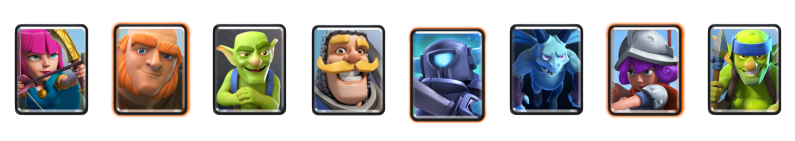

In [20]:
sort_and_replace_none = lambda x: sorted([str(e) if isinstance(e, str) else str(e) for e in x])

card_counts = pd.Series(card_analysis['Player Deck'].dropna().apply(sort_and_replace_none)).value_counts()

# Print the most frequent list and its count
most_common_card = card_counts.index[0]
most_common_count = card_counts[0]
print(f"The most common deck is {most_common_card} with a count of {most_common_count}.")
fig, axs = plt.subplots(1, len(most_common_card), figsize=(10, 4))

for i, card in enumerate(most_common_card):
    image = f"../Common/Cards Images/{card}.png"
    axs[i].imshow(plt.imread(image))
    axs[i].axis('off')

plt.show()

## 4. Most Common Deck That Won

The most common deck is ['Archers', 'Giant', 'Goblins', 'Knight', 'Mini P.E.K.K.A', 'Minions', 'Musketeer', 'Spear Goblins'] with a count of 1797.


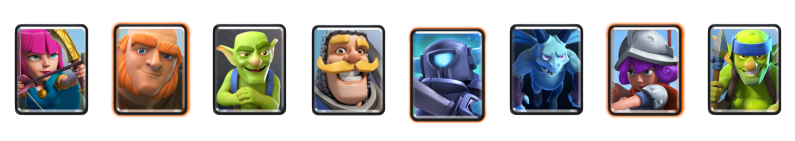

In [21]:
#We will first seperate them into 2 seperate df, winning and losing (df_sorted)
df_sorted = card_analysis.sort_values('outcome', ascending=False)
df_win=card_analysis[:4241]
df_lost= card_analysis[4241:]

sort_and_replace_none = lambda x: sorted([str(e) if isinstance(e, str) else str(e) for e in x])

card_counts = pd.Series(df_win['Player Deck'].dropna().apply(sort_and_replace_none)).value_counts()

# Print the most frequent list and its count
most_common_card = card_counts.index[0]
most_common_count = card_counts[0]
print(f"The most common deck is {most_common_card} with a count of {most_common_count}.")
fig, axs = plt.subplots(1, len(most_common_card), figsize=(10, 4))


for i, card in enumerate(most_common_card):
    image = f"../Common/Cards Images/{card}.png"
    axs[i].imshow(plt.imread(image))
    axs[i].axis('off')

plt.show()

## 5. Most Common Card (Elixir ALso)

The most common card is Giant. The Giant has a Elixir Cost of 5 


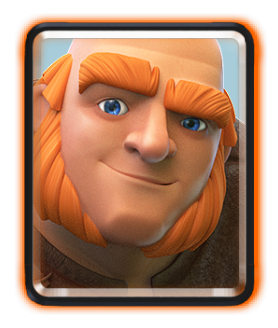

In [48]:
player_df=pd.read_csv("../Common/player_info.csv")
player_df = player_df.dropna(subset=["currentFavouriteCard"])
card_names=[]
for detail in player_df["currentFavouriteCard"]:
    detail= ast.literal_eval(detail)
    card_names.append(detail["name"])
card_counts = pd.Series(card_names).value_counts()
most_common_card = card_counts.index[0]
filtered_df = card_info[card_info['name'] == f"{most_common_card}"]
elixirCost=filtered_df["elixirCost"].iloc[0]

print(f"The most common card is {most_common_card}. The Giant has a Elixir Cost of {elixirCost} ")

fig, axs = plt.subplots(1, figsize=(10, 4))
image = f"../Common/Cards Images/{most_common_card}.png"
axs.imshow(plt.imread(image))
axs.axis('off')
plt.show()